In [1]:
import pandas as pd
from sklearn import preprocessing, decomposition, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from IPython.display import SVG
import pydotplus
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
from id3 import Id3Estimator, export_graphviz
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# creating a dataframe
df = pd.read_csv(r"BankNote_Authentication.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
## dropping duplicates
dup = df[df.duplicated()]
df.drop_duplicates()
dup.shape

(24, 5)

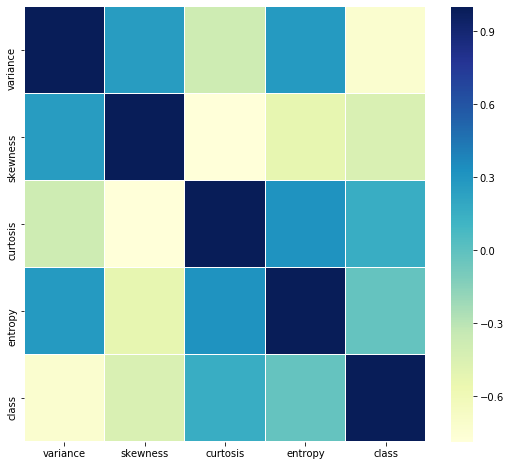

In [5]:
### Showing the correlation
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [6]:
# feature for predictor variable
x = df.drop(['class'], axis=1)
y = df['class']

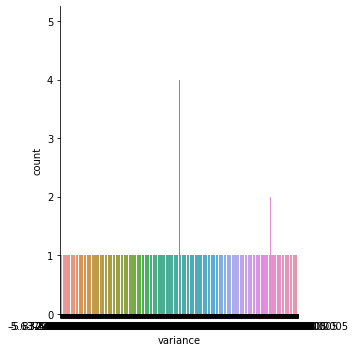

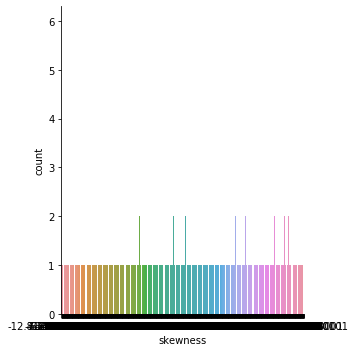

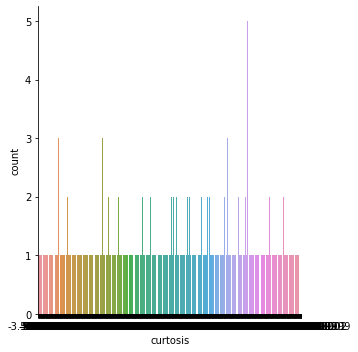

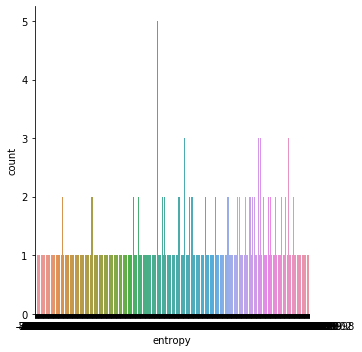

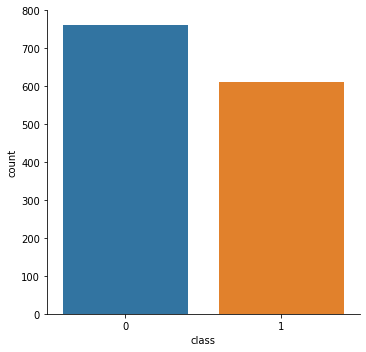

In [9]:
#### Plotting all the feautes
features = list(df.head(0))
for i in features:
    if df[i].astype != 'category':
        sns.factorplot(i,data=df,kind='count')

In [10]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


# Data preprocessing

In [11]:
# checking null values for preprcessing
pd.isna(x).sum()

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

In [12]:
#Scaling
x_s = preprocessing.scale(x)
y_s = preprocessing.scale(y)

In [13]:
le = preprocessing.LabelEncoder()
y_s = le.fit_transform(y_s)

In [15]:
# splitting the train dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=4)

In [28]:
features = list(x.head(0))

# ID3 implementation

In [16]:
## create the model, ID3 algorithm
estimator = Id3Estimator()
estimator.fit(x_train, y_train)

Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0, min_samples_split=2, prune=False)

In [29]:
export_graphviz(estimator.tree_, 'tree.dot', features)

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [18]:
# predicting on test features
y_pred = estimator.predict(x_test)

In [19]:
## checking accuracy
acc_id3 = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [20]:
acc_id3

0.9125364431486881

In [21]:
cm

array([[172,  24],
       [  6, 141]], dtype=int64)

# CART Algorithm

In [22]:
#### For CART algorithm by scikit-learn

In [23]:
# creating a CART model
cart = tree.DecisionTreeClassifier(criterion='gini')
cart.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Tree visualization

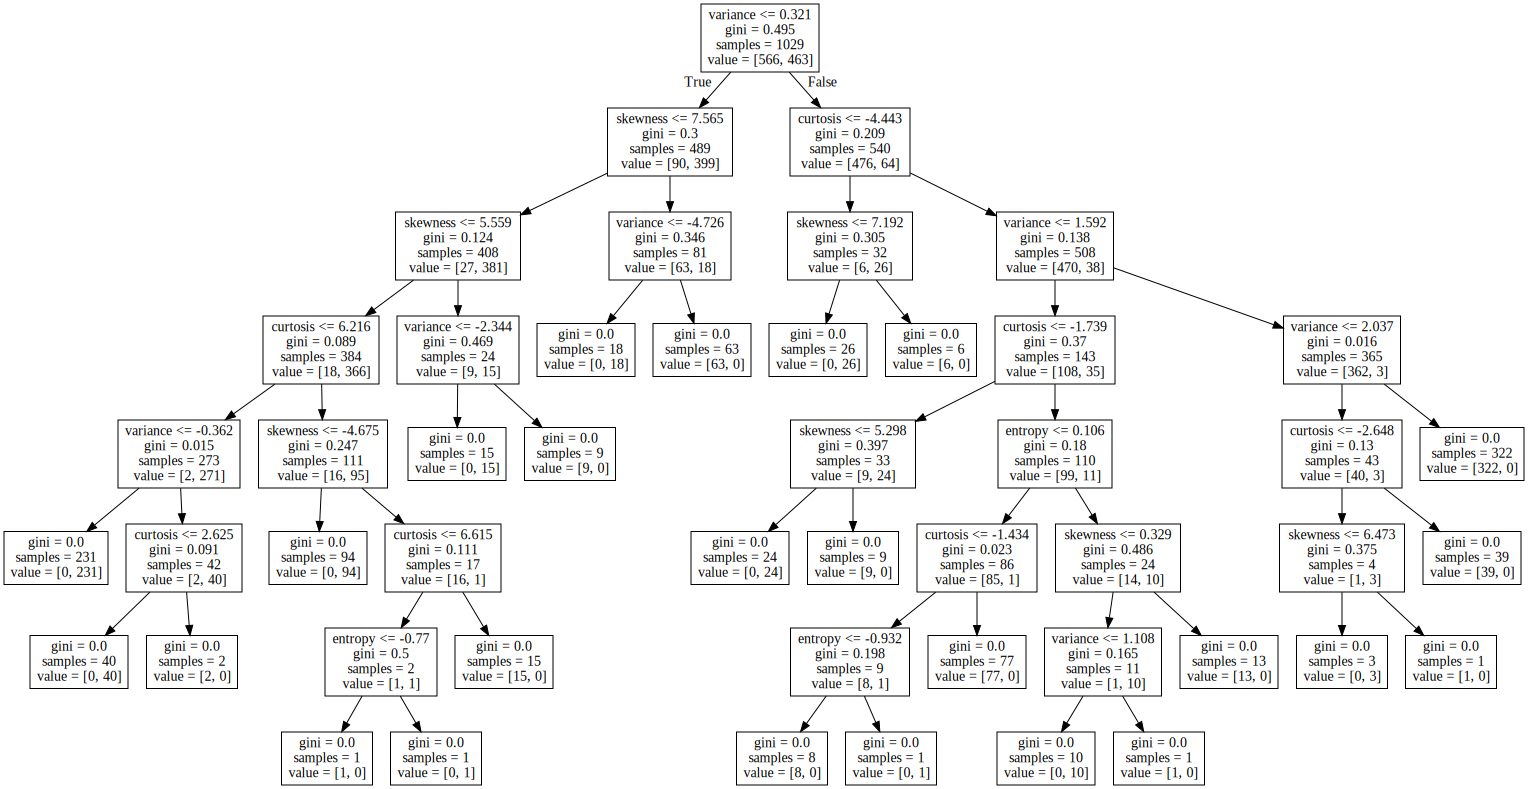

In [30]:
# showing the tree, here we can visualize the graph
graph = Source( tree.export_graphviz(cart, out_file=None, feature_names=features))
SVG(graph.pipe(format='svg'))

In [31]:
# predicting result on test data
y_pred_c = cart.predict(x_test)

In [32]:
# accuracy
acc_cart = accuracy_score(y_test, y_pred_c)
cm = confusion_matrix(y_test, y_pred_c)

In [33]:
# accuracy of CART
print(acc_cart)

0.9883381924198251


In [34]:
cm

array([[193,   3],
       [  1, 146]], dtype=int64)

# C 4.5

In [35]:
#### C4.5 model from geerk
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
# predicting score
y_pred = clf.predict(x_test)

In [37]:
# model evaluation
acc_c45 = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [38]:
acc_c45

0.9883381924198251

In [39]:
cm

array([[194,   2],
       [  2, 145]], dtype=int64)

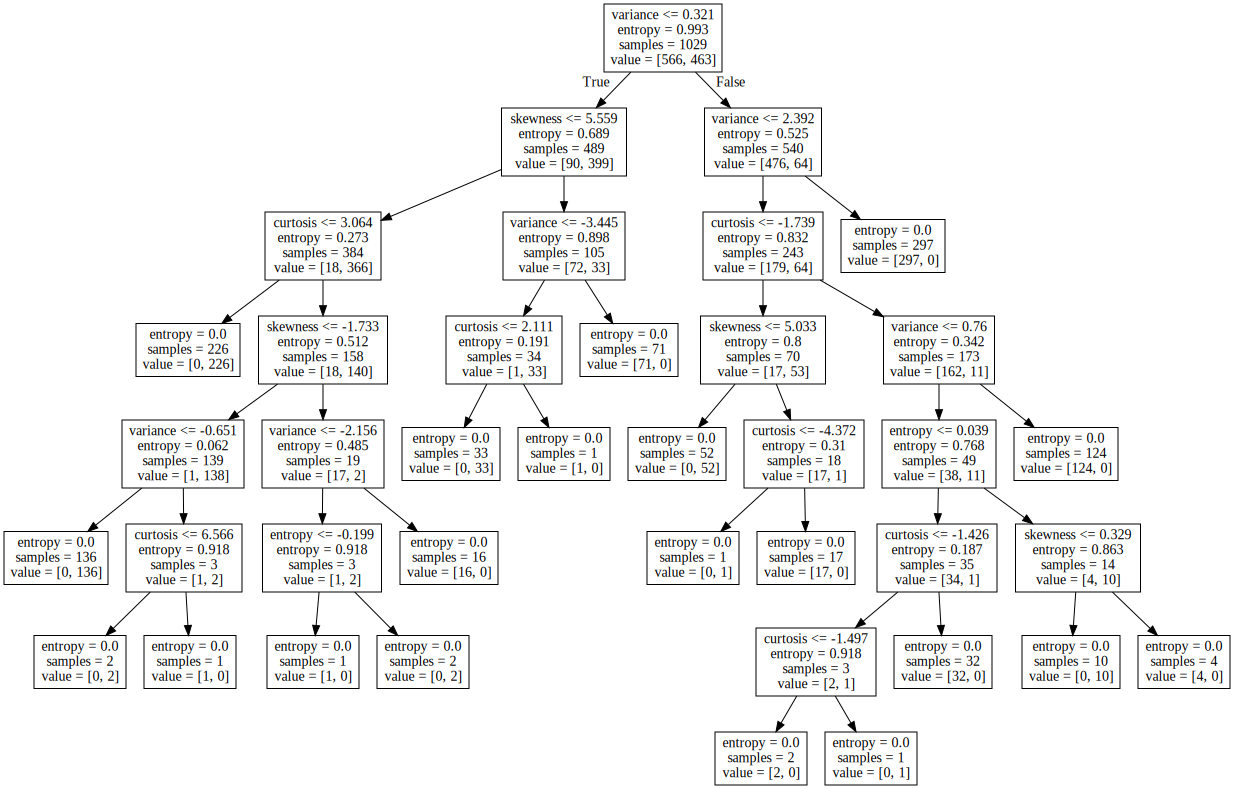

In [40]:
# showing the tree, here we can visualize the graph
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=features))
SVG(graph.pipe(format='svg'))

In [41]:
if acc_id3 > acc_cart:
    if acc_id3 > acc_c45:
        print("The Id3 performs best here")
    else:
        print("C4.5 performs best here")
        
else:
    if acc_cart > acc_c45:
        print("Cart performs the best")
    else:
        print("C4.5 performs best here")

C4.5 performs best here
